In [57]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<h3 style='color:red'>(1) Preprocessing: Detect face and eyes</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

In [5]:
img = cv2.imread('test_images/virat.jpg')
img.shape

(988, 678, 3)

In [6]:
#cv2.imshow('Sharapova',img)

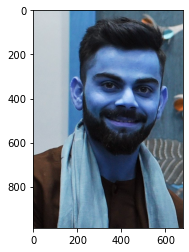

In [7]:
plt.imshow(img)

In [8]:
img

array([[[203, 209, 214],
        [204, 210, 215],
        [206, 212, 217],
        ...,
        [ 93, 121, 138],
        [ 95, 123, 140],
        [ 94, 122, 139]],

       [[202, 208, 213],
        [203, 209, 214],
        [204, 210, 215],
        ...,
        [ 91, 119, 136],
        [ 91, 119, 136],
        [ 89, 117, 134]],

       [[202, 208, 213],
        [202, 208, 213],
        [202, 208, 213],
        ...,
        [ 89, 119, 136],
        [ 88, 118, 135],
        [ 86, 116, 133]],

       ...,

       [[ 66,  47,  39],
        [ 65,  46,  38],
        [ 63,  46,  37],
        ...,
        [ 48,  37,  33],
        [ 50,  39,  35],
        [ 49,  38,  34]],

       [[ 66,  47,  39],
        [ 65,  46,  38],
        [ 63,  46,  37],
        ...,
        [ 50,  39,  35],
        [ 50,  39,  35],
        [ 47,  36,  32]],

       [[ 66,  47,  39],
        [ 65,  46,  38],
        [ 63,  46,  37],
        ...,
        [ 51,  40,  36],
        [ 48,  37,  33],
        [ 44,  33,  29]]

In [9]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(988, 678)

In [10]:
gray

array([[210, 211, 213, ..., 123, 125, 124],
       [209, 210, 211, ..., 121, 121, 119],
       [209, 209, 209, ..., 121, 120, 118],
       ...,
       [ 47,  46,  45, ...,  37,  39,  38],
       [ 47,  46,  45, ...,  39,  39,  36],
       [ 47,  46,  45, ...,  40,  37,  33]], dtype=uint8)

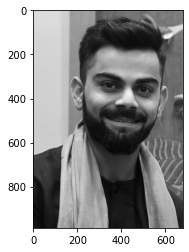

In [11]:
plt.imshow(gray, cmap='gray')

In [12]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[203, 182, 428, 428]])

In [13]:
(x,y,w,h) = faces[0]

In [14]:
x,y,w,h

(203, 182, 428, 428)

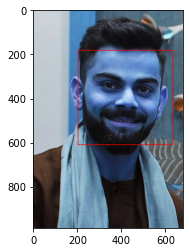

In [15]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [16]:
cv2.destroyAllWindows()

##### For detection of eyes

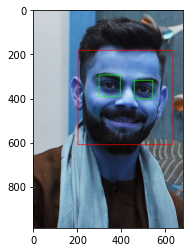

In [17]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:red'>(2) Preprocessing: Crop the facial region of the image</h3>

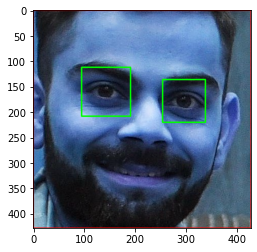

In [18]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [19]:
roi_color.shape

(428, 428, 3)

<h3 style='color:red'>(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

This function has a corner case to it, in case of 2 images detected it will return only the first image as final output

###### Test 1

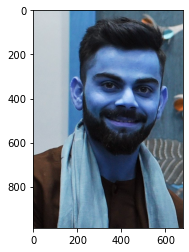

In [21]:
original_face_image = cv2.imread('./test_images/virat.jpg')
plt.imshow(original_face_image)

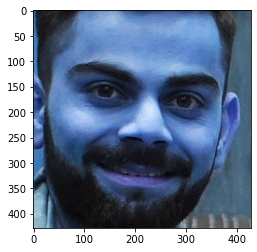

In [22]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/virat.jpg')
plt.imshow(cropped_image)

###### Test2

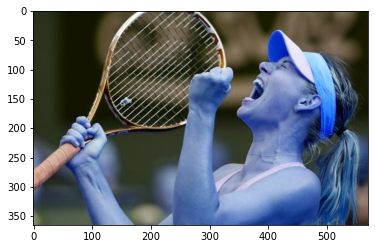

In [23]:
original_face_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(original_face_image_obstructed)

In [24]:
cropped_image_new = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_new

#### Since in the image there is only 1 eye the function returned no o/p as it will return an o/p only if 2 eyes are detected

**Above cropped_image_no_new is None which means we should ignore this image and we will not use such image for model training**

In [25]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [26]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [27]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [28]:
# If the cropped folder exists then remove it and create it again

import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [29]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/lionel_messi
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


### Now we should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [30]:
celebrity_file_names_dict

{'cropped': [],
 'lionel_messi': ['./dataset/cropped/lionel_messi/lionel_messi1.png',
  './dataset/cropped/lionel_messi/lionel_messi2.png',
  './dataset/cropped/lionel_messi/lionel_messi3.png',
  './dataset/cropped/lionel_messi/lionel_messi4.png',
  './dataset/cropped/lionel_messi/lionel_messi5.png',
  './dataset/cropped/lionel_messi/lionel_messi6.png',
  './dataset/cropped/lionel_messi/lionel_messi7.png',
  './dataset/cropped/lionel_messi/lionel_messi8.png',
  './dataset/cropped/lionel_messi/lionel_messi9.png',
  './dataset/cropped/lionel_messi/lionel_messi10.png',
  './dataset/cropped/lionel_messi/lionel_messi11.png',
  './dataset/cropped/lionel_messi/lionel_messi12.png',
  './dataset/cropped/lionel_messi/lionel_messi13.png',
  './dataset/cropped/lionel_messi/lionel_messi14.png',
  './dataset/cropped/lionel_messi/lionel_messi15.png',
  './dataset/cropped/lionel_messi/lionel_messi16.png',
  './dataset/cropped/lionel_messi/lionel_messi17.png',
  './dataset/cropped/lionel_messi/lionel_m

<h3 style='color:red'>(3) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

### Wavelet Transformation

In [31]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

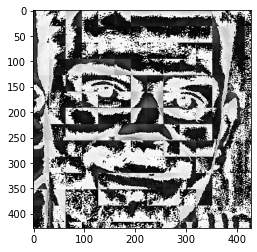

In [32]:
img_har = w2d(cropped_image,'db1',5)
plt.imshow(img_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

In [33]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [34]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count += 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [35]:
X, y =[], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [36]:
# Total no of images in the final cropped folder is 167
len(X)

167

In [37]:
# Size of each image
len(X[0])

4096

In [38]:
# Why 4096?
# Since we verticallly stacked the images
# 32*32*3 + 32*32
# 3072 + 1024 

32*32*3 + 32*32

4096

In [39]:
type(X)

list

In [40]:
X

[array([[100],
        [129],
        [140],
        ...,
        [237],
        [234],
        [232]], dtype=uint8),
 array([[ 14],
        [ 13],
        [ 15],
        ...,
        [  9],
        [250],
        [250]], dtype=uint8),
 array([[ 25],
        [ 33],
        [ 34],
        ...,
        [ 14],
        [  6],
        [220]], dtype=uint8),
 array([[ 64],
        [ 65],
        [ 75],
        ...,
        [246],
        [  3],
        [251]], dtype=uint8),
 array([[ 35],
        [ 32],
        [ 31],
        ...,
        [215],
        [136],
        [ 20]], dtype=uint8),
 array([[228],
        [223],
        [222],
        ...,
        [  0],
        [  0],
        [  0]], dtype=uint8),
 array([[ 35],
        [ 30],
        [ 31],
        ...,
        [ 54],
        [ 87],
        [195]], dtype=uint8),
 array([[164],
        [123],
        [  1],
        ...,
        [118],
        [192],
        [  2]], dtype=uint8),
 array([[131],
        [125],
        [130],
        ...

In [41]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [42]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [43]:
# We will convert values in the X list as float.

In [44]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(167, 4096)

In [45]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [46]:
# Int type will give some warning while training model in sklearn so we are converting it to Float

In [47]:
# Ready for model training with X & y.

### Data Cleaning done

### Model Training

We will use SVM classifier

In [48]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [50]:
model_pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])

model_pipe.fit(X_train, y_train)
model_pipe.score(X_test, y_test)

0.8571428571428571

In [51]:
preds = model_pipe.predict(X_test)

In [52]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.89      0.80      0.84        10
           2       0.62      0.83      0.71         6
           3       1.00      1.00      1.00         8
           4       0.85      1.00      0.92        11

    accuracy                           0.86        42
   macro avg       0.87      0.84      0.84        42
weighted avg       0.88      0.86      0.85        42



### GridSearch - To try out different models with different parameters to get best model with best fine tuned parameters

In [55]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [84]:
model_params = {
    'svm': {
            'model': SVC(gamma='auto',probability=True),
            'params' : {
                        'svc__C': [1,10,100,1000],
                        'svc__kernel': ['rbf','linear']
                     }  
    },
    'random_forest': {
                    'model': RandomForestClassifier(),
                    'params' : {
                          'randomforestclassifier__n_estimators': [1,5,10]
                           }
    },
    'logistic_regression' : {
                'model': LogisticRegression(solver='liblinear',multi_class='auto'),
                'params': {
                        'logisticregression__C': [1,5,10]
                         }
    }
}

In [85]:
scores = []
best_estimators = {}

for algo, model_parameters in model_params.items():
    pipe = make_pipeline(StandardScaler(), model_parameters['model'])
    grid_cv_model = GridSearchCV(estimator=pipe, param_grid=model_parameters['params'], cv=5, return_train_score=False)
    grid_cv_model.fit(X_train, y_train)
    
    scores.append({
        'Model': algo,
        'Best_score': grid_cv_model.best_score_,
        'Best_params': grid_cv_model.best_params_
    })
    
    best_estimators[algo] = grid_cv_model.best_estimator_
    
model_performance_df = pd.DataFrame(scores,columns=['Model','Best_score','Best_params'])

In [86]:
model_performance_df

,Model,Best_score,Best_params
0,svm,0.808,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.656,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.848,{'logisticregression__C': 1}


In [81]:
model_performance_df

,Model,Best_score,Best_params
0,svm,0.800,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.672,{'n_estimators': 10}
2,logistic_regression,0.824,{'C': 1}


In [63]:
model_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'svc', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [67]:
m=SVC()

In [68]:
m.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [82]:
best_estimators

{'svm': SVC(C=1, gamma='auto', kernel='linear', probability=True),
 'random_forest': RandomForestClassifier(n_estimators=10),
 'logistic_regression': LogisticRegression(C=1, solver='liblinear')}

In [87]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [88]:
type(best_estimators)

dict

In [93]:
# This gives the svm model which has the best hypertuned parameter
best_estimators['svm']

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [89]:
best_`estimators['svm'].score(X_test, y_test)

0.9523809523809523

In [90]:
best_estimators['random_forest'].score(X_test, y_test)

0.6904761904761905

In [92]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9523809523809523

#### Final Model

In [95]:
best_clf = best_estimators['svm']

In [96]:
best_clf_predictions = best_clf.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix

model_confusion_matrix = confusion_matrix(y_test, best_clf_predictions)
model_confusion_matrix

array([[ 7,  0,  0,  0,  0],
       [ 0,  9,  0,  1,  0],
       [ 0,  1,  5,  0,  0],
       [ 0,  0,  0,  8,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

In [98]:
len(X_test)

42

In [99]:
import seaborn as sns

Text(69.0, 0.5, 'Truth')

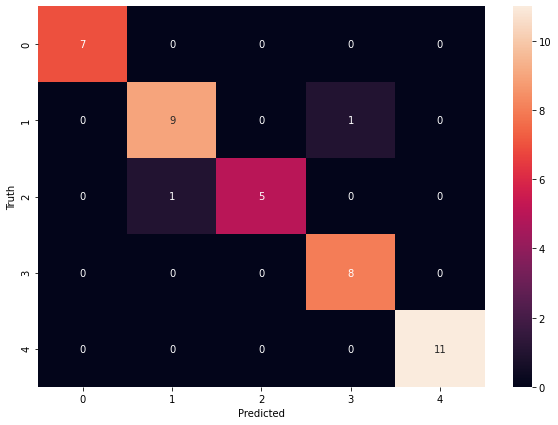

In [100]:
plt.figure(figsize=(10,7))
sns.heatmap(model_confusion_matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Saving best model

In [101]:
import joblib

In [102]:
# Save the model as a pickle file
joblib.dump(best_clf,"Saved_model.pkl")

['Saved_model.pkl']

### Save class dictionary

In [104]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))